In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

KeyboardInterrupt: 

In [3]:
image_path = "../output/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

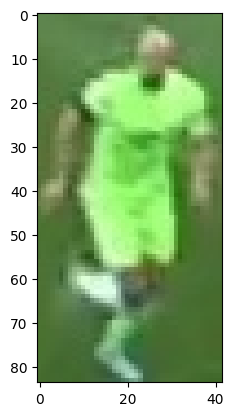

In [4]:
plt.imshow(image)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

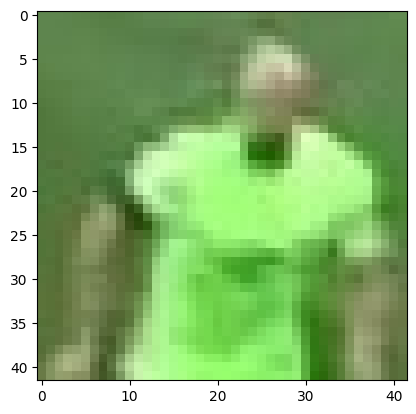

In [5]:
#take top half of image
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

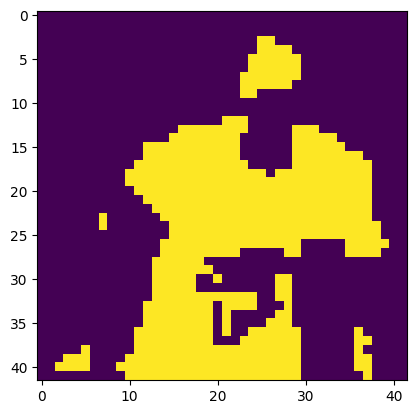

In [6]:
#cluster the image into two
#rehsape image into 2d array
image_2d = top_half_image.reshape(-1,3)

#perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(image_2d)

#get cluster labels
labels = kmeans.labels_

#reshape labels to original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

plt.imshow(clustered_image)
plt.show

In [7]:
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

0


In [8]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

1


In [9]:
kmeans.cluster_centers_[player_cluster]


array([159.04049296, 229.49295775, 126.67605634])